In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")


In [5]:
df_feedback=pd.read_csv(r'C:\Users\DELL\Downloads\archive (6)\student_feedback.csv')

In [6]:
df_feedback.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [7]:
df_feedback.isnull().sum()

Unnamed: 0                                              0
Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64

In [10]:
id_cols = [c for c in df_feedback.columns if c.lower() in ["student id", "student_id"]]
student_id_col = id_cols[0] if len(id_cols) else "Student ID"
meta_cols = [c for c in df_feedback.columns if c in ["Unnamed: 0", student_id_col]]
rating_cols = [c for c in df_feedback.columns if c not in meta_cols]

In [11]:
df_work = df_feedback.copy()
df_work["overall_index"] = df_work[rating_cols].mean(axis=1)


In [13]:
df_long = df_work.melt(id_vars=[student_id_col, "overall_index"], value_vars=rating_cols,
                       var_name="dimension", value_name="rating")


In [14]:
rec_col = "Course recommendation based on relevance" if "Course recommendation based on relevance" in df_work.columns else rating_cols[-1]
seg_vals = pd.cut(df_work[rec_col], bins=[-np.inf, 6, 8, np.inf], labels=["At-risk (<=6)", "Passive (7-8)", "Promoter (9-10)"])
df_work["rec_segment"] = seg_vals.astype(str)

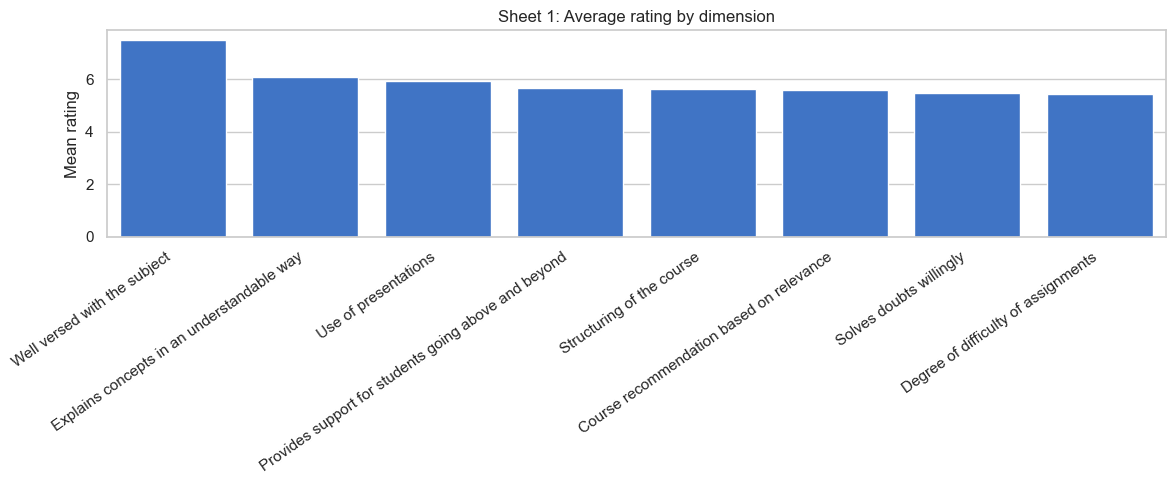

In [15]:
mean_by_dim = df_work[rating_cols].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
sns.barplot(x=mean_by_dim.index, y=mean_by_dim.values, color="#2a6fdb")
plt.xticks(rotation=35, ha="right")
plt.ylabel("Mean rating")
plt.xlabel("")
plt.title("Sheet 1: Average rating by dimension")
plt.tight_layout()
plt.show()

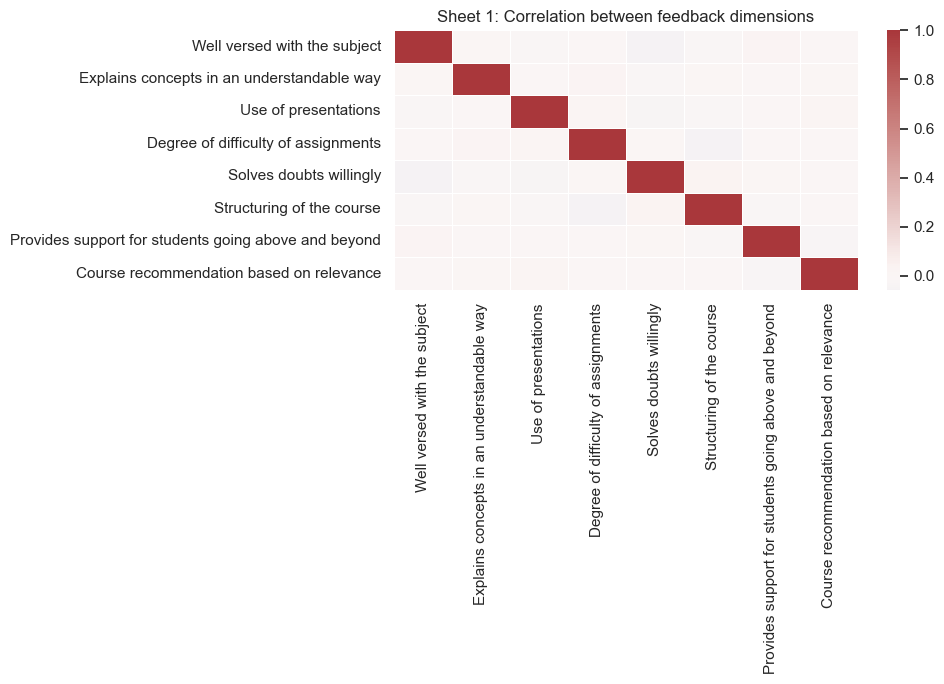

In [16]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_work[rating_cols].corr(), cmap="vlag", center=0, linewidths=0.5)
plt.title("Sheet 1: Correlation between feedback dimensions")
plt.tight_layout()
plt.show()

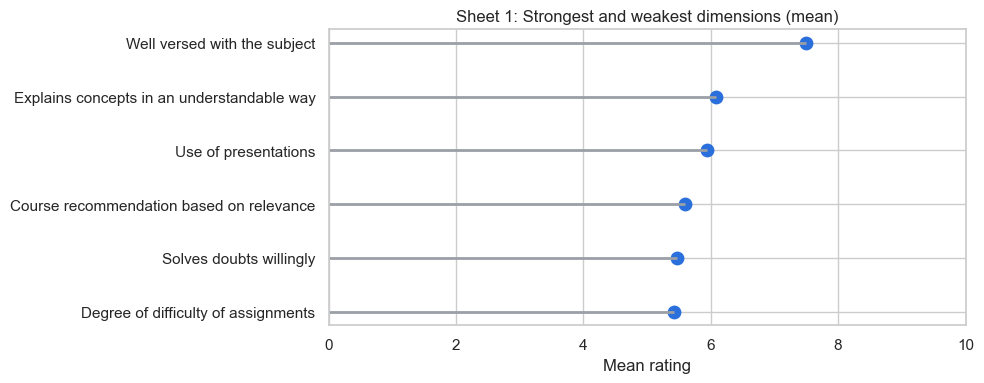

In [17]:
means_df = mean_by_dim.reset_index()
means_df.columns = ["dimension", "mean"]
top3 = means_df.head(3)
bot3 = means_df.tail(3)
sel_df = pd.concat([top3, bot3], ignore_index=True)
sel_df = sel_df.sort_values("mean")
plt.figure(figsize=(10, 4))
plt.hlines(y=sel_df["dimension"], xmin=0, xmax=sel_df["mean"], color="#9aa0a6", linewidth=2)
plt.scatter(sel_df["mean"], sel_df["dimension"], color="#2a6fdb", s=80)
plt.xlim(0, 10)
plt.xlabel("Mean rating")
plt.ylabel("")
plt.title("Sheet 1: Strongest and weakest dimensions (mean)")
plt.tight_layout()
plt.show()


In [18]:
teaching_dims = [
    "Well versed with the subject",
    "Explains concepts in an understandable way",
    "Use of presentations",
    "Solves doubts willingly",
]
teaching_dims = [c for c in teaching_dims if c in rating_cols]
if len(teaching_dims) < 2:
    teaching_dims = [c for c in rating_cols if c != rec_col]

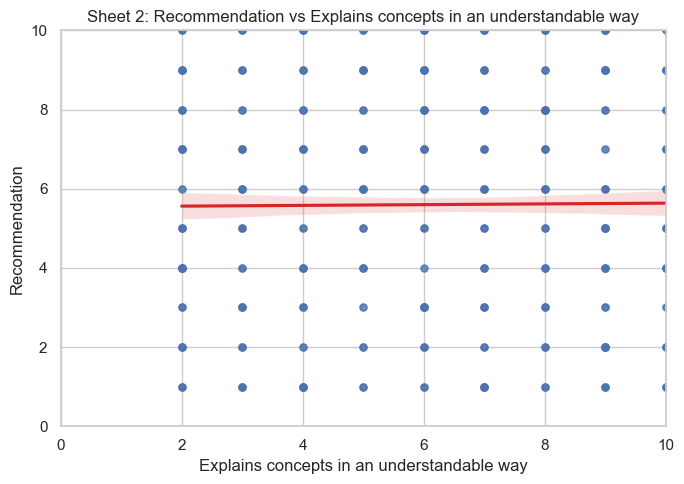

In [19]:
x_dim = "Explains concepts in an understandable way" if "Explains concepts in an understandable way" in rating_cols else teaching_dims[0]
plt.figure(figsize=(7, 5))
sns.regplot(data=df_work, x=x_dim, y=rec_col, scatter_kws={"alpha":0.25, "s":25}, line_kws={"color":"#d62728"})
plt.title("Sheet 2: Recommendation vs " + x_dim)
plt.xlabel(x_dim)
plt.ylabel("Recommendation")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

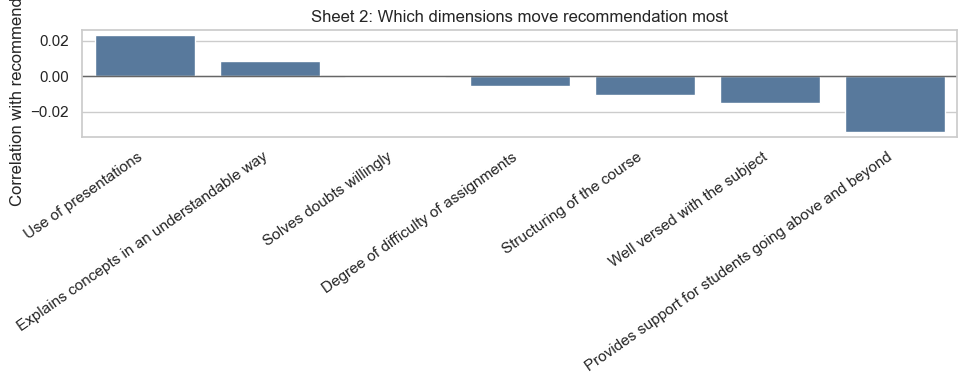

In [20]:
corr_with_rec = df_work[rating_cols].corr()[rec_col].drop(rec_col).sort_values(ascending=False)
plt.figure(figsize=(10, 4))
sns.barplot(x=corr_with_rec.index, y=corr_with_rec.values, color="#4c78a8")
plt.xticks(rotation=35, ha="right")
plt.ylabel("Correlation with recommendation")
plt.xlabel("")
plt.title("Sheet 2: Which dimensions move recommendation most")
plt.axhline(0, color="#666666", linewidth=1)
plt.tight_layout()
plt.show()

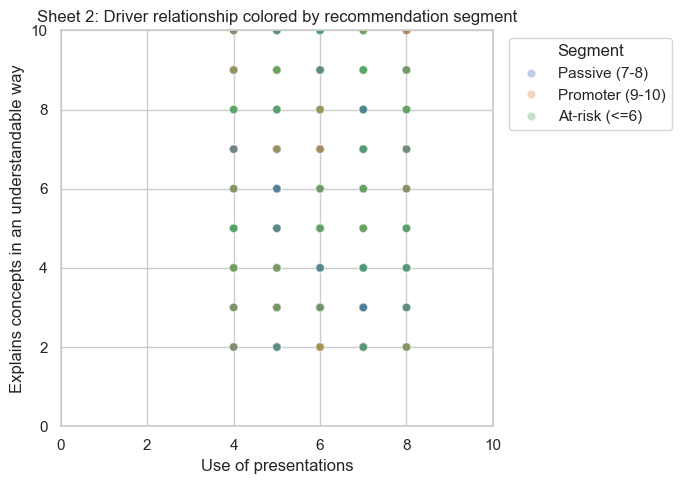

In [21]:
if len(corr_with_rec) >= 2:
    driver1 = corr_with_rec.index[0]
    driver2 = corr_with_rec.index[1]
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=df_work, x=driver1, y=driver2, hue="rec_segment", alpha=0.35)
    plt.title("Sheet 2: Driver relationship colored by recommendation segment")
    plt.xlabel(driver1)
    plt.ylabel(driver2)
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.legend(title="Segment", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

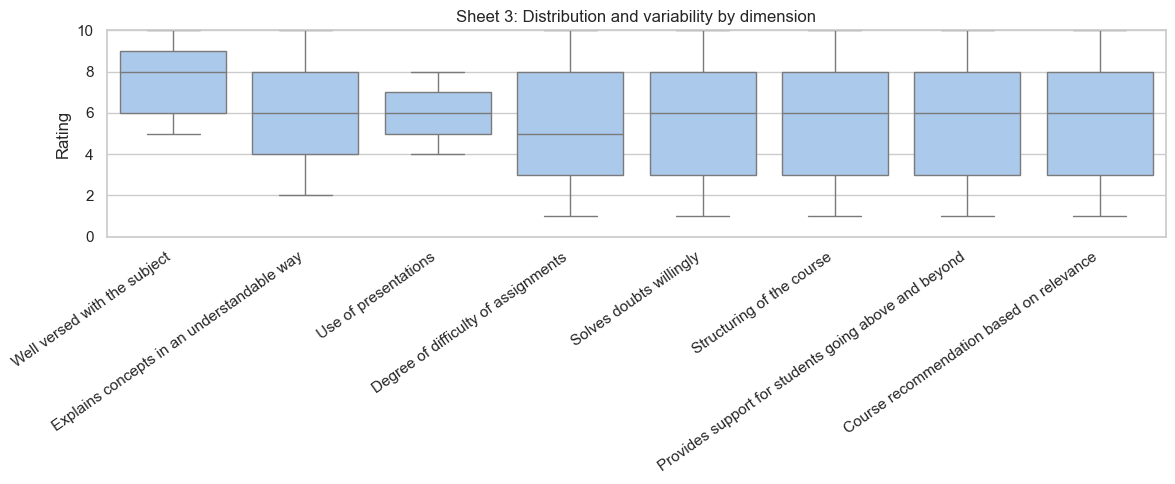

In [22]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_long, x="dimension", y="rating", color="#a1c9f4")
plt.xticks(rotation=35, ha="right")
plt.xlabel("")
plt.ylabel("Rating")
plt.title("Sheet 3: Distribution and variability by dimension")
plt.ylim(0, 10)
plt.tight_layout()
plt.show()


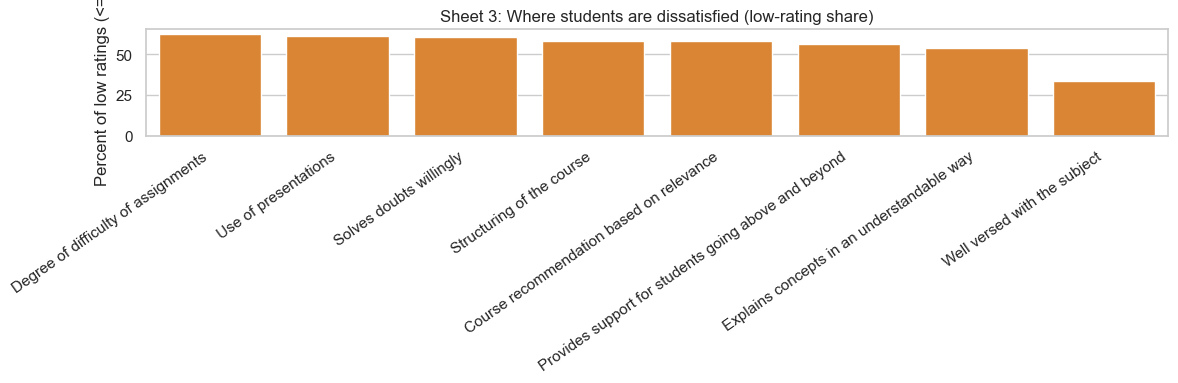

In [23]:
low_threshold = 6
low_share = (df_long.assign(is_low=df_long["rating"] <= low_threshold)
             .groupby("dimension")["is_low"].mean().sort_values(ascending=False))
plt.figure(figsize=(12, 4))
sns.barplot(x=low_share.index, y=(low_share.values * 100.0), color="#f58518")
plt.xticks(rotation=35, ha="right")
plt.ylabel("Percent of low ratings (<=6)")
plt.xlabel("")
plt.title("Sheet 3: Where students are dissatisfied (low-rating share)")
plt.tight_layout()
plt.show()

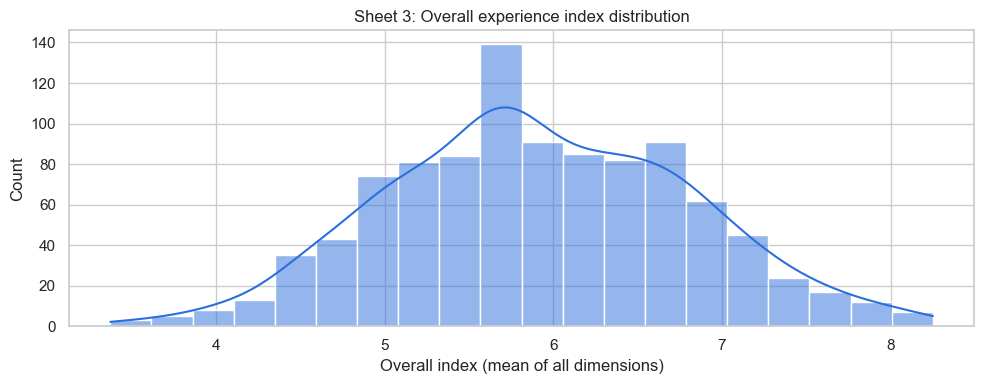

In [24]:
plt.figure(figsize=(10, 4))
sns.histplot(df_work["overall_index"], bins=20, kde=True, color="#2a6fdb")
plt.title("Sheet 3: Overall experience index distribution")
plt.xlabel("Overall index (mean of all dimensions)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

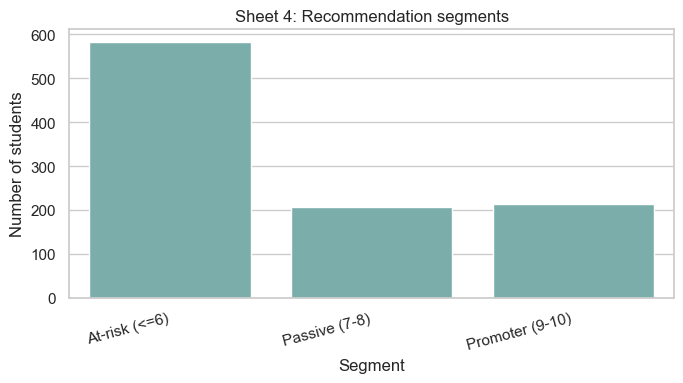

In [25]:
plt.figure(figsize=(7, 4))
seg_order = ["At-risk (<=6)", "Passive (7-8)", "Promoter (9-10)"]
sns.countplot(data=df_work, x="rec_segment", order=seg_order, color="#72b7b2")
plt.title("Sheet 4: Recommendation segments")
plt.xlabel("Segment")
plt.ylabel("Number of students")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.show()

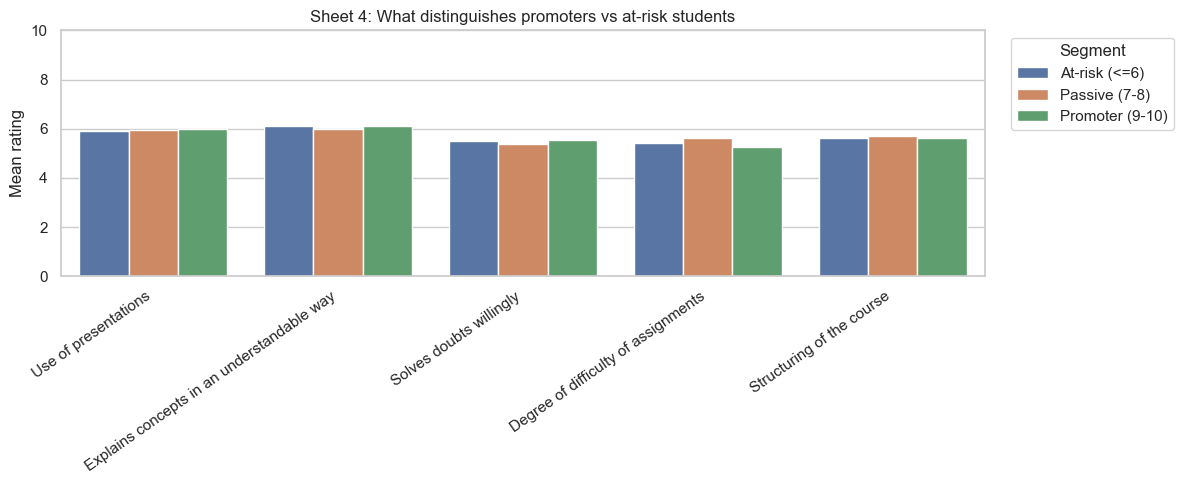

In [26]:
key_dims = list(corr_with_rec.head(5).index) if "corr_with_rec" in locals() else rating_cols[:5]
key_dims = [c for c in key_dims if c in rating_cols]
seg_means = (df_work.groupby("rec_segment")[key_dims]
             .mean()
             .reindex(seg_order))
seg_means_long = seg_means.reset_index().melt(id_vars="rec_segment", var_name="dimension", value_name="mean_rating")
plt.figure(figsize=(12, 5))
sns.barplot(data=seg_means_long, x="dimension", y="mean_rating", hue="rec_segment", hue_order=seg_order)
plt.xticks(rotation=35, ha="right")
plt.xlabel("")
plt.ylabel("Mean rating")
plt.title("Sheet 4: What distinguishes promoters vs at-risk students")
plt.ylim(0, 10)
plt.legend(title="Segment", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

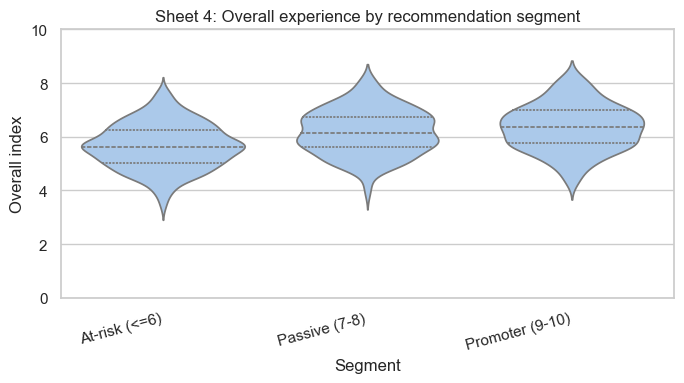

In [27]:
plt.figure(figsize=(7, 4))
sns.violinplot(data=df_work, x="rec_segment", y="overall_index", order=seg_order, inner="quartile", color="#a1c9f4")
plt.title("Sheet 4: Overall experience by recommendation segment")
plt.xlabel("Segment")
plt.ylabel("Overall index")
plt.ylim(0, 10)
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.show()